# Wine Quality Prediction Using Machine Learning 

### Internship Task 6 - Data Analytics Internship
### Predicting Wine Quality Based on Chemical Characteristics 

This Project focuses on predicting the quality of wine using machine learning classification models based on its chemical properties.

## Project Objectives 

- Explore and Understand the wine quality dataset
- Perform data cleaning and preprocessing
- Analyze chemical features influencing wine quality
- Build multiple classification models
- Compare model performance
- Visualize results and insights 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

plt.style.use("default")

In [2]:
df=pd.read_csv("C:/Users/agast/Downloads/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Dataset Overview
The dataset contains chemical properties of wine samples along with a quality score that represents wine quality.

In [3]:
df.shape

(1143, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Data Cleaning 


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

## Wine Quality Distribution

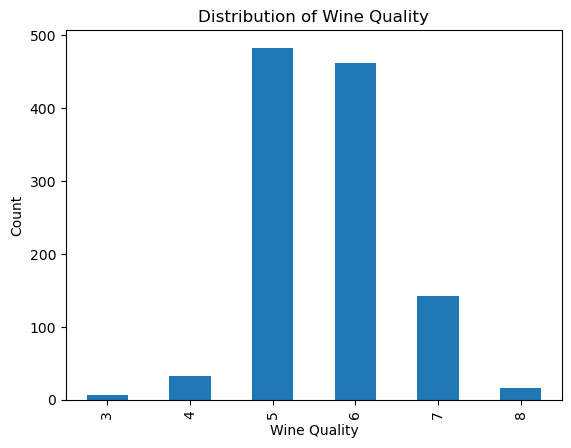

In [6]:
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Wine Quality")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


## Feature Selection

In [8]:
X = df.drop('quality', axis=1)
y = df['quality']


## Feature Scaling

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


## Classification Models

The following models are used for wine quality prediction:
- Random Forest Classifier
- Stochastic Gradient Descent Classifier
- Support Vector Classifier (SVC)


In [12]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)


In [13]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)

sgd_pred = sgd_model.predict(X_test)


In [14]:
svc_model = SVC()
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)


## Model Evaluation

In [15]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_pred))
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))


Random Forest Accuracy: 0.6855895196506551
SGD Classifier Accuracy: 0.5589519650655022
SVC Accuracy: 0.6593886462882096


## Confusion Matrix (Best Model)

The confusion matrix helps understand
classification performance in detail.


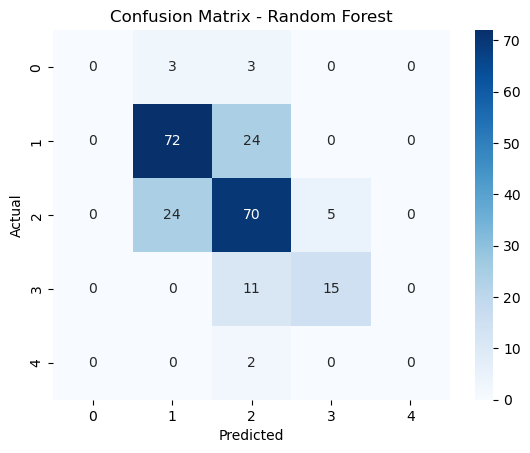

In [16]:
cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Key Insights

- Chemical properties can effectively predict wine quality
- Random Forest performs better compared to other models
- Feature scaling improves model performance


## Conclusion

This project demonstrates the use of multiple classification
algorithms to predict wine quality based on chemical features.
Comparing different models provides insight into their
performance and suitability for classification tasks.
